In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy.optimize import differential_evolution
from io import StringIO
from sklearn.metrics import mean_squared_error

s = StringIO("""
T,Campaign 1,Campaign 2,Campaign 3,Revenue
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1,4.8
10,199.8,2.6,21.2,10.6
11,66.1,5.8,24.2,8.6
12,214.7,24,4,17.4
13,23.8,35.1,65.9,9.2
14,97.5,7.6,7.2,9.7
15,204.1,32.9,46,19
16,195.4,47.7,52.9,22.4
17,67.8,36.6,114,12.5
18,281.4,39.6,55.8,24.4
19,69.2,20.5,18.3,11.3
20,147.3,23.9,19.1,14.6
21,218.4,27.7,53.4,18
22,237.4,5.1,23.5,12.5
23,13.2,15.9,49.6,5.6
24,228.3,16.9,26.2,15.5
25,62.3,12.6,18.3,9.7
26,262.9,3.5,19.5,12
27,142.9,29.3,12.6,15
28,240.1,16.7,22.9,15.9
29,248.8,27.1,22.9,18.9
30,70.6,16,40.8,10.5
31,292.9,28.3,43.2,21.4
32,112.9,17.4,38.6,11.9
33,97.2,1.5,30,9.6
34,265.6,20,0.3,17.4
35,95.7,1.4,7.4,9.5
36,290.7,4.1,8.5,12.8
37,266.9,43.8,5,25.4
38,74.7,49.4,45.7,14.7
39,43.1,26.7,35.1,10.1
40,228,37.7,32,21.5
41,202.5,22.3,31.6,16.6
42,177,33.4,38.7,17.1
43,293.6,27.7,1.8,20.7
44,206.9,8.4,26.4,12.9
45,25.1,25.7,43.3,8.5
46,175.1,22.5,31.5,14.9
47,89.7,9.9,35.7,10.6
48,239.9,41.5,18.5,23.2
49,227.2,15.8,49.9,14.8
50,66.9,11.7,36.8,9.7
51,199.8,3.1,34.6,11.4
52,100.4,9.6,3.6,10.7
53,216.4,41.7,39.6,22.6
54,182.6,46.2,58.7,21.2
55,262.7,28.8,15.9,20.2
56,198.9,49.4,60,23.7
57,7.3,28.1,41.4,5.5
58,136.2,19.2,16.6,13.2
59,210.8,49.6,37.7,23.8
60,210.7,29.5,9.3,18.4
61,53.5,2,21.4,8.1
62,261.3,42.7,54.7,24.2
63,239.3,15.5,27.3,15.7
64,102.7,29.6,8.4,14
65,131.1,42.8,28.9,18
66,69,9.3,0.9,9.3
67,31.5,24.6,2.2,9.5
68,139.3,14.5,10.2,13.4
69,237.4,27.5,11,18.9
70,216.8,43.9,27.2,22.3
71,199.1,30.6,38.7,18.3
72,109.8,14.3,31.7,12.4
73,26.8,33,19.3,8.8
74,129.4,5.7,31.3,11
75,213.4,24.6,13.1,17
76,16.9,43.7,89.4,8.7
77,27.5,1.6,20.7,6.9
78,120.5,28.5,14.2,14.2
79,5.4,29.9,9.4,5.3
80,116,7.7,23.1,11
81,76.4,26.7,22.3,11.8
82,239.8,4.1,36.9,12.3
83,75.3,20.3,32.5,11.3
84,68.4,44.5,35.6,13.6
85,213.5,43,33.8,21.7
86,193.2,18.4,65.7,15.2
87,76.3,27.5,16,12
88,110.7,40.6,63.2,16
89,88.3,25.5,73.4,12.9
90,109.8,47.8,51.4,16.7
91,134.3,4.9,9.3,11.2
92,28.6,1.5,33,7.3
93,217.7,33.5,59,19.4
94,250.9,36.5,72.3,22.2
95,107.4,14,10.9,11.5
96,163.3,31.6,52.9,16.9
97,197.6,3.5,5.9,11.7
98,184.9,21,22,15.5
99,289.7,42.3,51.2,25.4
100,135.2,41.7,45.9,17.2
101,222.4,4.3,49.8,11.7
102,296.4,36.3,100.9,23.8
103,280.2,10.1,21.4,14.8
104,187.9,17.2,17.9,14.7
105,238.2,34.3,5.3,20.7
106,137.9,46.4,59,19.2
107,25,11,29.7,7.2
108,90.4,0.3,23.2,8.7
109,13.1,0.4,25.6,5.3
110,255.4,26.9,5.5,19.8
111,225.8,8.2,56.5,13.4
112,241.7,38,23.2,21.8
113,175.7,15.4,2.4,14.1
114,209.6,20.6,10.7,15.9
115,78.2,46.8,34.5,14.6
116,75.1,35,52.7,12.6
117,139.2,14.3,25.6,12.2
118,76.4,0.8,14.8,9.4
119,125.7,36.9,79.2,15.9
120,19.4,16,22.3,6.6
121,141.3,26.8,46.2,15.5
122,18.8,21.7,50.4,7
123,224,2.4,15.6,11.6
124,123.1,34.6,12.4,15.2
125,229.5,32.3,74.2,19.7
126,87.2,11.8,25.9,10.6
127,7.8,38.9,50.6,6.6
128,80.2,0,9.2,8.8
129,220.3,49,3.2,24.7
130,59.6,12,43.1,9.7
131,0.7,39.6,8.7,1.6
132,265.2,2.9,43,12.7
133,8.4,27.2,2.1,5.7
134,219.8,33.5,45.1,19.6
135,36.9,38.6,65.6,10.8
136,48.3,47,8.5,11.6
137,25.6,39,9.3,9.5
138,273.7,28.9,59.7,20.8
139,43,25.9,20.5,9.6
140,184.9,43.9,1.7,20.7
141,73.4,17,12.9,10.9
142,193.7,35.4,75.6,19.2
143,220.5,33.2,37.9,20.1
144,104.6,5.7,34.4,10.4
145,96.2,14.8,38.9,11.4
146,140.3,1.9,9,10.3
147,240.1,7.3,8.7,13.2
148,243.2,49,44.3,25.4
149,38,40.3,11.9,10.9
150,44.7,25.8,20.6,10.1
151,280.7,13.9,37,16.1
152,121,8.4,48.7,11.6
153,197.6,23.3,14.2,16.6
154,171.3,39.7,37.7,19
155,187.8,21.1,9.5,15.6
156,4.1,11.6,5.7,3.2
157,93.9,43.5,50.5,15.3
158,149.8,1.3,24.3,10.1
159,11.7,36.9,45.2,7.3
160,131.7,18.4,34.6,12.9
161,172.5,18.1,30.7,14.4
162,85.7,35.8,49.3,13.3
163,188.4,18.1,25.6,14.9
164,163.5,36.8,7.4,18
165,117.2,14.7,5.4,11.9
166,234.5,3.4,84.8,11.9
167,17.9,37.6,21.6,8
168,206.8,5.2,19.4,12.2
169,215.4,23.6,57.6,17.1
170,284.3,10.6,6.4,15
171,50,11.6,18.4,8.4
172,164.5,20.9,47.4,14.5
173,19.6,20.1,17,7.6
174,168.4,7.1,12.8,11.7
175,222.4,3.4,13.1,11.5
176,276.9,48.9,41.8,27
177,248.4,30.2,20.3,20.2
178,170.2,7.8,35.2,11.7
179,276.7,2.3,23.7,11.8
180,165.6,10,17.6,12.6
181,156.6,2.6,8.3,10.5
182,218.5,5.4,27.4,12.2
183,56.2,5.7,29.7,8.7
184,287.6,43,71.8,26.2
185,253.8,21.3,30,17.6
186,205,45.1,19.6,22.6
187,139.5,2.1,26.6,10.3
188,191.1,28.7,18.2,17.3
189,286,13.9,3.7,15.9
190,18.7,12.1,23.4,6.7
191,39.5,41.1,5.8,10.8
192,75.5,10.8,6,9.9
193,17.2,4.1,31.6,5.9
194,166.8,42,3.6,19.6
195,149.7,35.6,6,17.3
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177,9.3,6.4,12.8
199,283.6,42,66.2,25.5
200,232.1,8.6,8.7,13.4
""")
data = pd.read_csv(s, index_col=0)
target = 'Revenue'
features = ['Campaign 1', 'Campaign 2', 'Campaign 3']

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Построим графики зависимости переменных

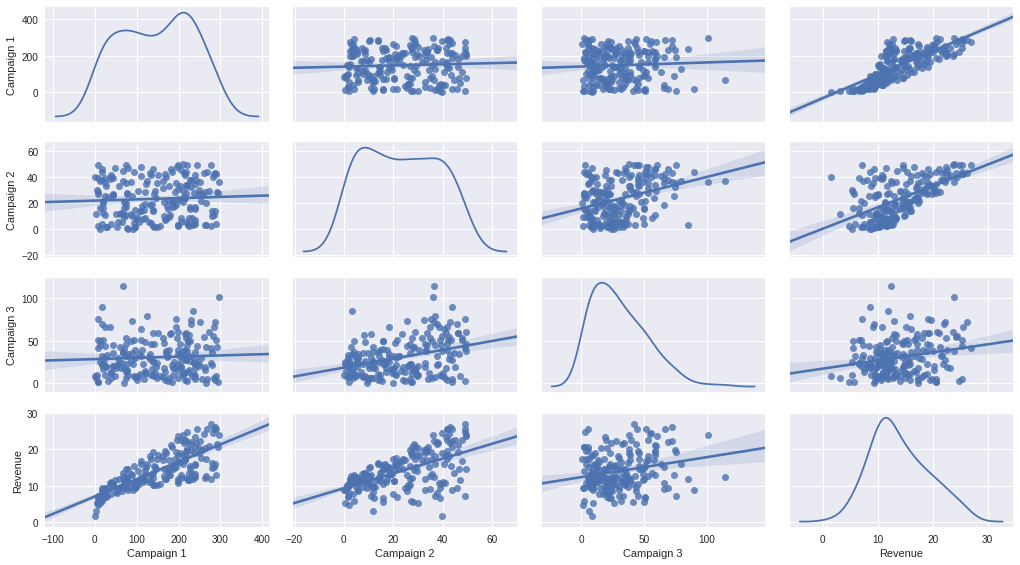

In [2]:
sns.pairplot(data, size=2, aspect=1.8, kind='reg', diag_kind="kde");

Выводы:


1.   некоторые распределения мультимодальные, скорее всего мы имеем дело со смесью распределений, имеет смысл посмотреть их пересечение
2.   зависимости между переменными и целевой функцией не везде линейны, имеет смысл попробовать логарифм


# Построим линейную модель для все переменных

RMSE: 1.6685701407225697
                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 23 Oct 2018   Prob (F-statistic):           1.58e-96
Time:                        14:12:15   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      

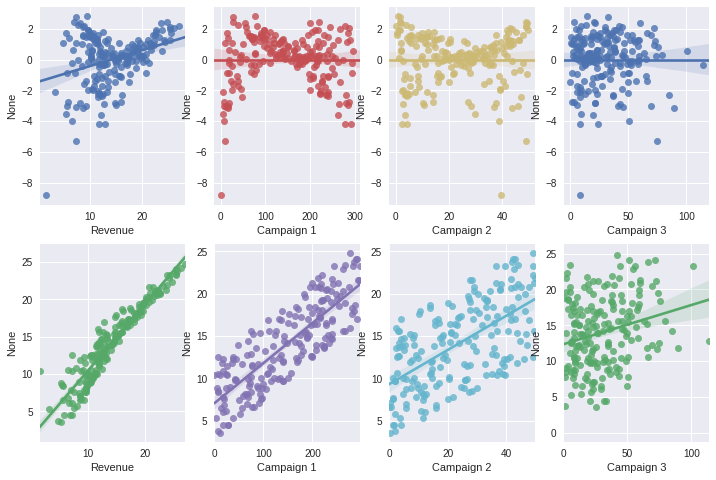

In [3]:
def train(data, target, features, add_constant=True):
    y = data[target]
    X = data[features]
    if add_constant:
        X = sm.add_constant(data[features])
    linreg = sm.OLS(y, X)
    res = linreg.fit()
    pred = res.predict(X)
    print('RMSE:', np.sqrt(mean_squared_error(pred, y)))
    print(res.summary())
    f, ax = plt.subplots(2, len(features) + 1, figsize=(4 * len(features), 8))
    for i, col in enumerate([target, *features]):
        sns.regplot(data[col], res.resid, ax=ax[0, i])
        ax[1, i].set_xlim(data[col].min(), data[col].max())
        sns.regplot(data[col], pred, ax=ax[1, i])
    return res

train(data, target, features)

Выводы:

1.   модель значима, зависима от компаний 1 и 2
2.   распределение ошибки не обладает свойствами расномерности и гетескодастичности по некоторым из переменных, требуется делать преобразования

# Добавим переменные логарифмов, пересечения и разности



RMSE: 0.3035435285287343
                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     6185.
Date:                Tue, 23 Oct 2018   Prob (F-statistic):          2.50e-229
Time:                        14:12:22   Log-Likelihood:                -45.342
No. Observations:                 200   AIC:                             110.7
Df Residuals:                     190   BIC:                             143.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
c

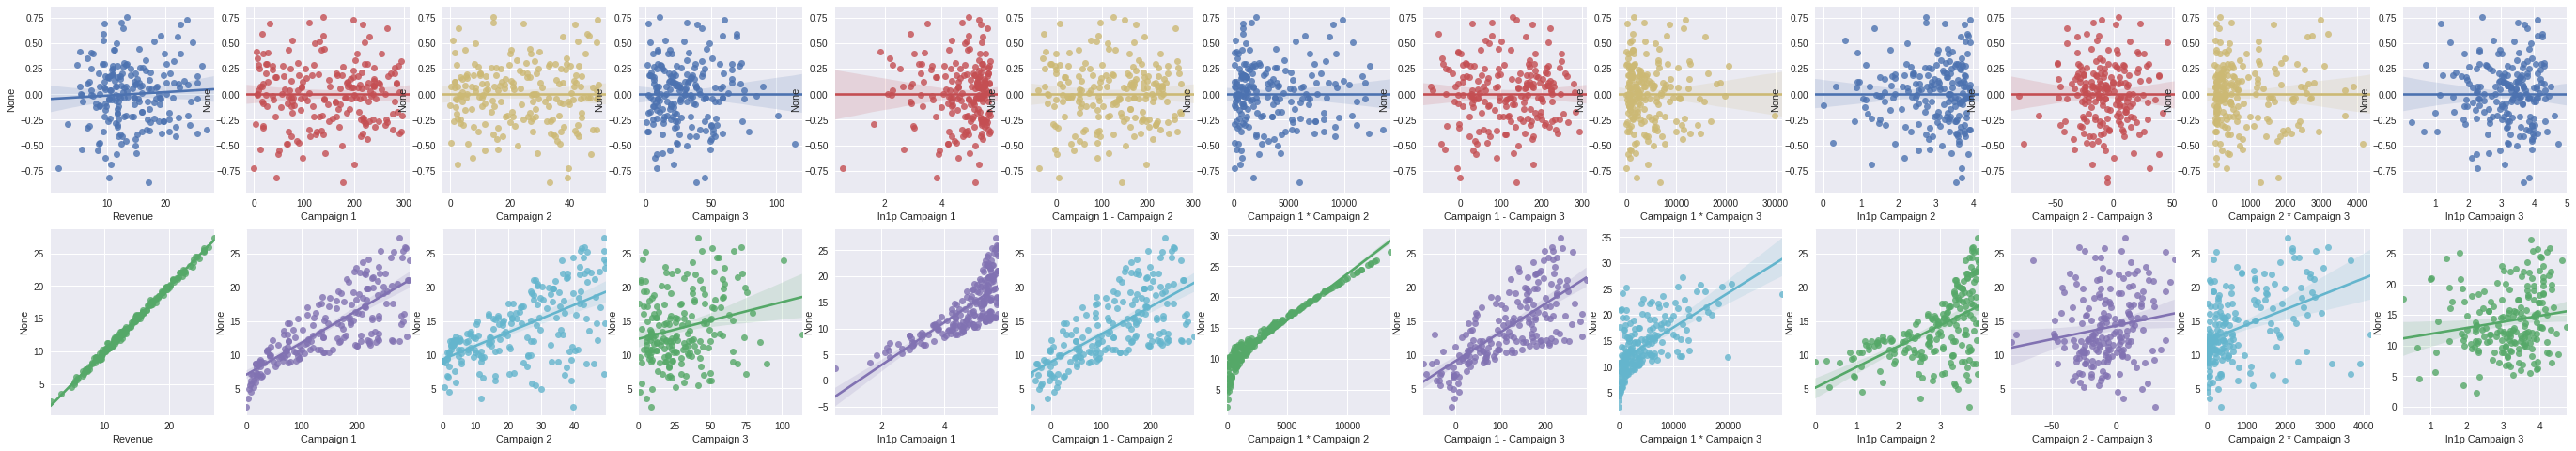

In [4]:
df = data.copy()
f = features.copy()
for i, c1 in enumerate(features):
    for opp, func in {'ln1p': np.log1p}.items():
        new_col = '{} {}'.format(opp, c1)
        df[new_col] = func(data[c1])
        f.append(new_col)
    for c2 in features[i+1:]:
        for opp, func in {'-': np.subtract, '*': np.multiply}.items():
            new_col = '{} {} {}'.format(c1, opp, c2)
            df[new_col] = func(df[c1], df[c2])
            f.append(new_col)

train(df, target, f, add_constant=True)

модель стала гораздо лучше, однако среди переменных есть много мусора

# Выберем только значимые переменные



RMSE: 0.30727232014220734
                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.109e+04
Date:                Tue, 23 Oct 2018   Prob (F-statistic):          2.93e-236
Time:                        14:12:39   Log-Likelihood:                -47.784
No. Observations:                 200   AIC:                             107.6
Df Residuals:                     194   BIC:                             127.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------


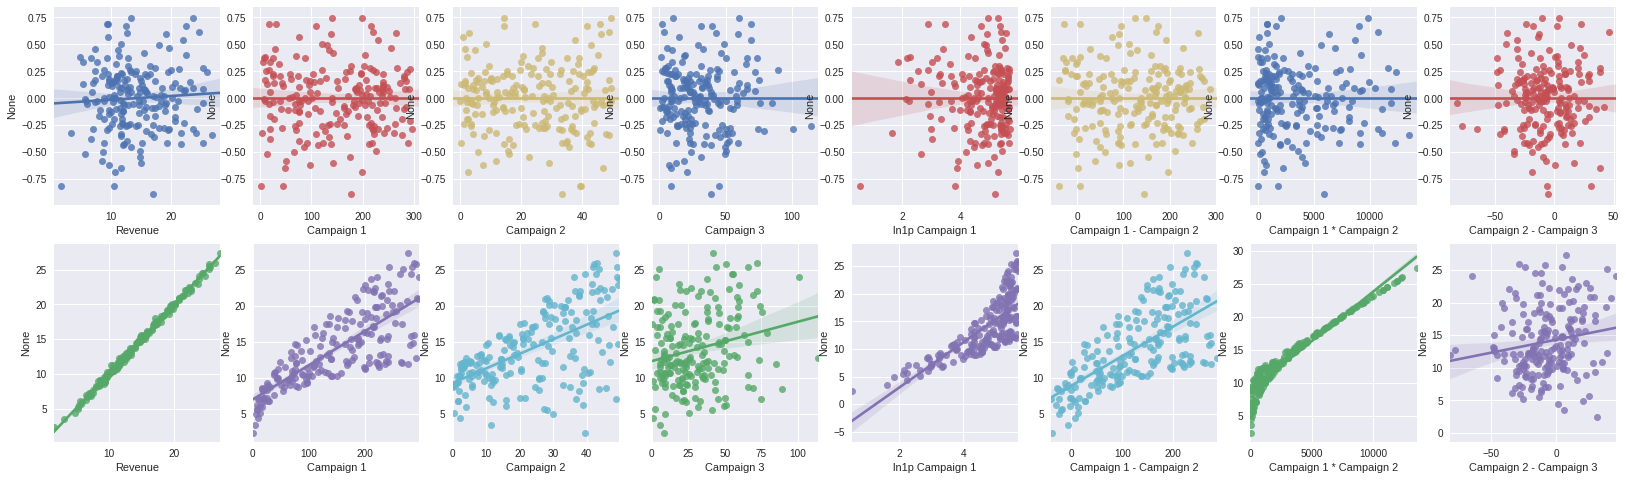

In [5]:
imp_features = [
    'Campaign 1',
    'Campaign 2',
    'Campaign 3',
    'ln1p Campaign 1',
    'Campaign 1 - Campaign 2',
    'Campaign 1 * Campaign 2',
    'Campaign 2 - Campaign 3',
]
res = train(df, target, imp_features, add_constant=True)

# Исходя из фиксированного бюджета на платформу, найдем распределение максимизирующее выручку

In [51]:
budget_per_platform = data[features].sum().sum() / len(data)
def predict(c1, c2, c3):
    return res.predict([1, c1, c2, c3, np.log1p(c1), c1 - c2, c1 * c2, c2 - c3])

def obj(pars, fit=False):
    a, b = pars
    c1, c2, c3 = np.array([(1 - a), a * b, a * (1 - b)]) * budget_per_platform
    if fit:
        return -predict(c1, c2, c3)
    else:
        return pd.Series([c1, c2, c3, *predict(c1, c2, c3)], index=['Campaign 1', 'Campaign 2', 'Campaign 3', 'Revenue'])
    
obj([.3, .3])
pars = differential_evolution(obj, [[0, 1]] * 2, args=[('fit', True)]).x
print(pars)
print(pd.DataFrame({'actuals:': data.mean(), 'maximazied:': obj(pars)}))


[0.55508305 1.        ]
            actuals:  maximazied:
Campaign 1  147.0425    89.366242
Campaign 2   23.2640   111.494258
Campaign 3   30.5540     0.000000
Revenue      14.0225    24.295013


Мы можем увеличить выручку на ~70% перераспределив расходы на кампании